In [1]:
from learningAgents import ReinforceAlgorithm
from environmentModel import Model, AdversaryModes

In [2]:
game = Model(totalDemand = 400, 
               tupleCosts = (57, 71),
              totalStages = 25,
            initState = [200,200], adversaryMode='fight_132')

In [3]:
game.reset()

(tensor([200., 200.]), 0, False)

In [4]:
game.adversaryChoosePrice()

135.5

In [5]:
import torch
import torch.nn as nn
from torch.distributions import Categorical

# Hyperparameters
def NeuralNetwork():
    lr = .000001
    num_actions = 20

    nn_ = 100

    policy = nn.Sequential(
                           nn.Linear(2, nn_), 
                           nn.ReLU(),
                           nn.Linear(nn_,nn_),
                           nn.ReLU(),
                           nn.Linear(nn_,num_actions),                       
                           nn.Softmax(dim=0))
    optim = torch.optim.Adam(policy.parameters(), lr=lr)

    return policy, optim


In [6]:
algorithm = ReinforceAlgorithm(game, NeuralNetwork, numberIterations=6, numberEpisodes=100000, discountFactor =0.9)

0
10000
20000
30000
40000
50000
60000
70000
80000
90000


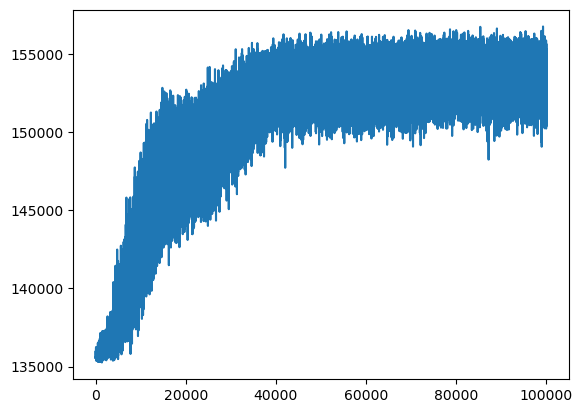

0
10000
20000
30000
40000
50000
60000
70000
80000
90000


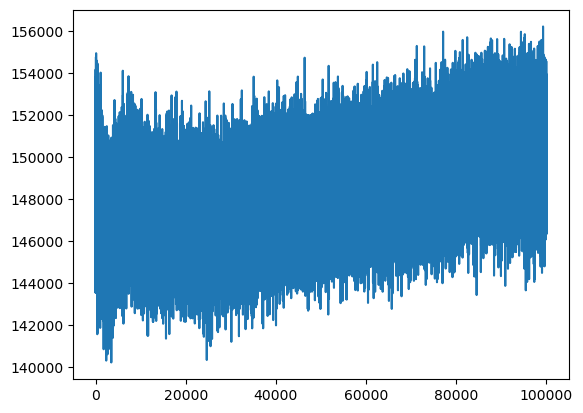

0
10000
20000
30000
40000
50000
60000
70000
80000
90000


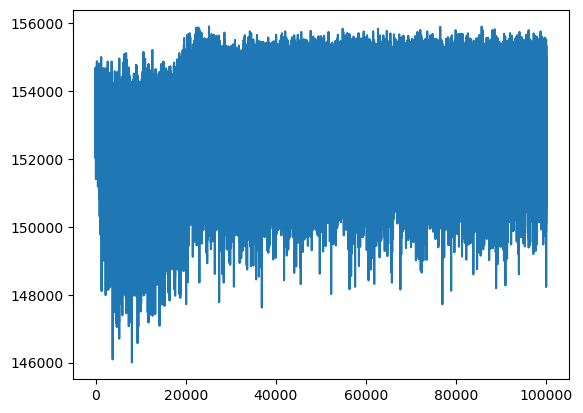

0
10000
20000
30000
40000
50000
60000
70000
80000
90000


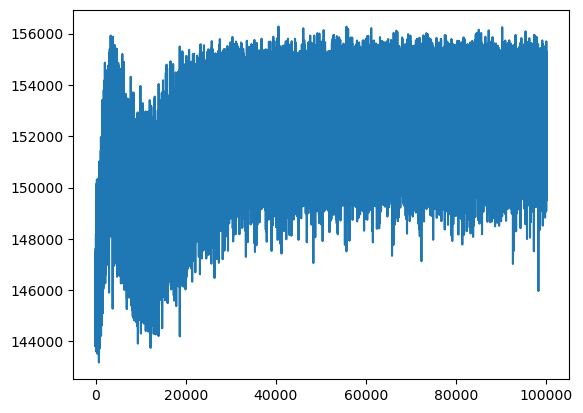

0
10000
20000
30000
40000
50000
60000
70000
80000
90000


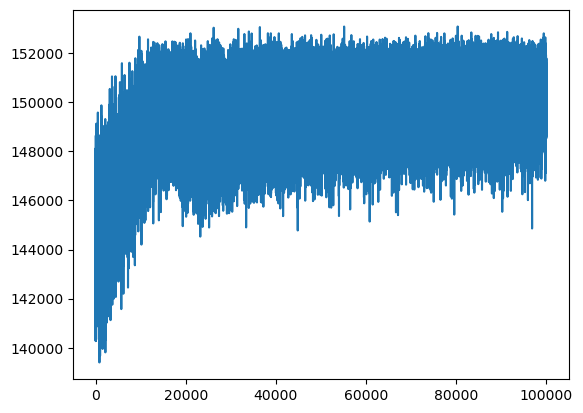

0
10000
20000
30000
40000
50000
60000
70000
80000
90000


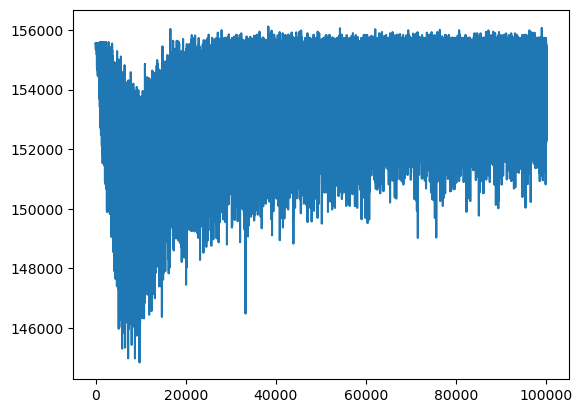

In [7]:
algorithm.solver()

In [8]:
algorithm.bestAverageRetu

153455.87480926668

In [9]:
import pandas as pd
profits = pd.DataFrame(game.profit).T
prices = pd.DataFrame(game.prices).T
demandPotential = pd.DataFrame(game.demandPotential).T
learning = pd.DataFrame(algorithm.returns.mean(axis = 0))

<AxesSubplot:>

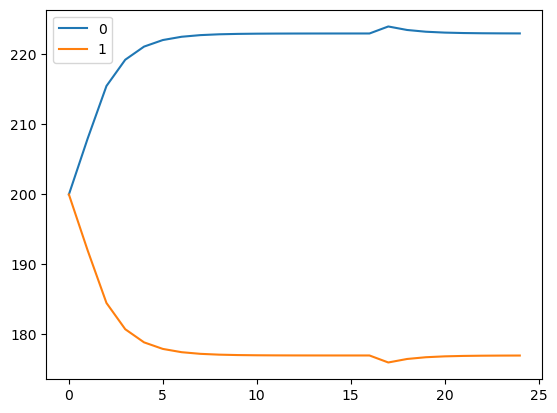

In [10]:
demandPotential.plot()

In [11]:
profits.sum(axis=0)

0    155272.286582
1     70327.411096
dtype: float64

<AxesSubplot:>

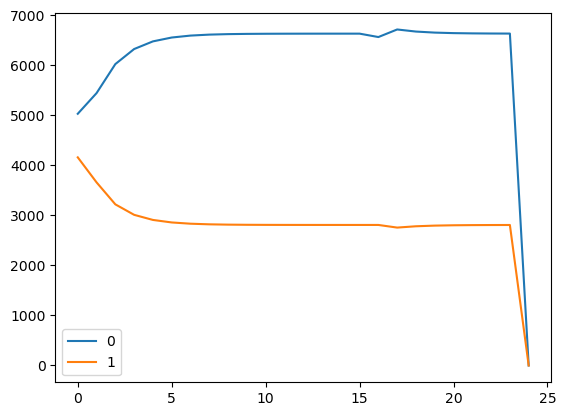

In [12]:
profits.plot()

<AxesSubplot:>

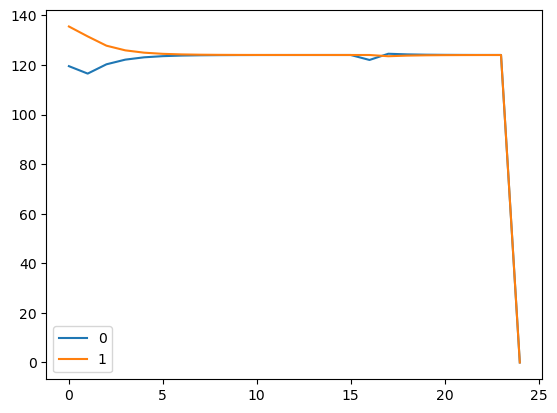

In [13]:
prices.plot()

<AxesSubplot:>

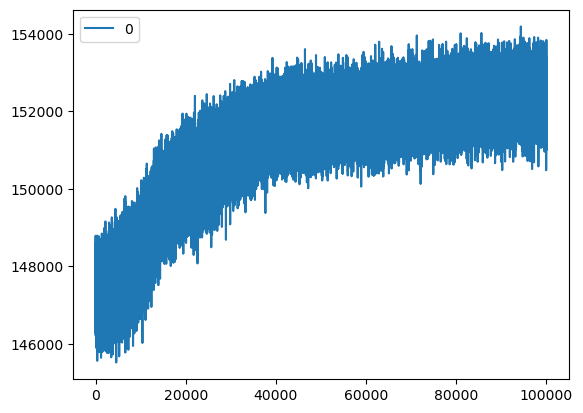

In [14]:
learning.plot()